## Inicjalizacja środowiska programistycznego

In [62]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np
import skimage

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Transponowana warstwa splotowa

Architektury używające warstw splotowych i łączących prowadzą zwykle do redukcji rozmiaru obrazu, ang. `downsampling`,
w kolejnych warstwach sieci. Warstwy, które prowadzą do zwiększenia rozmiaru obrazu to warstwy ekspansji, ang. `upsampling layers`.
Najbardziej popularną warstwą ekspansji jest transponowana warstwa splotowa, ang. `transposed convlolution layer`.


Źródło rysunków: [A guide to convolution arithmetic for deep learning, arXiv:1603.07285](https://arxiv.org/abs/1603.07285)

Standardowa reprezentacja splotu, jako okna z wagami przesuwającego się po obrazie:

![image.png](attachment:db6bc85f-24a0-4bad-9f1f-00daa624229b.png)

Macierzowa reprezentacja splotu. Obraz wejściowy w tej reprezentacji jest spłaszczony do wektora:

![image.png](attachment:d4d0f120-60ec-49f1-8906-c329ef465de1.png)

Wędrujące okno może być zastąpione pojedynczą operacją mnożenia macierzy reprezentującej wagi dla wszystkich elementów obrazu.
Dla przykładu powyżej macierz reprezentująca wszystkie wagi splotu ma postać:

![image.png](attachment:8a974149-ba67-4146-9b50-36be2f367de6.png)

Operacja splotu sprowadza się więc do mnożenia macierzy:

$$
{\huge
r = C \times d
}
$$
**r** - wynik splotu o kształcie (4,1)

**C** - macierz splotu, o kształcie (4,16)

**d** - wektor danych o kształcie (16,1)


Macierz wynikowa w tym przykładzie ma kształt `(4,1)` i można ją zamienić na macierz o kształcie `(2,2)`, takim jakiego oczekujuemy dla
wyniku splotu w tym przykładzie.

Macierz $C^{T}$ możemy traktować jako macierz operacji transpozycji która przeprowadza wektory o kształcie `(4,1)` w wektory o kształcie `(16,1)`

$$
{\huge
r' = C^{T} \times r
}
$$
**r'** - wynik splotu o kształcie (16,1)

$\mathbf{C^{T}}$ - macierz splotu o kształcie (4,16)

**r** - wektor danych o kształcie (4,1)

W ten sposób uzyskaliśmy skalowanie w górę - z wektora o rozmiarze `(4,1)` uzyskaliśmy wektor o rozmiarze `(16,1)`

**Uwaga:** transponowany splot nie odtwarza oryginalnej macierzy danych, ponieważ w ogólności


$$
{\huge
C^{T} \cdot C \neq 1_{16 \times 16}
}
$$
**Po operacji splotu transponowanego odzyskujemy jedynie oryginalny kształt.**

Splot transponowany może być też reprezentowany jako standardowy splot z odpowiednim wypełnianiem zerami.

![image.png](attachment:02252792-cf0b-4d03-ba72-7d6aa4dbb1f1.png)

Interfejs użytkownika warstwy konwolucyjnej w Keras:
```Python
tf.keras.layers.Conv2DTranspose(
    filters,             # liczba filtrów
    kernel_size,         # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),      # wartość kroku w obu wymiarach
    padding='valid',     # sposób dopełnienia:
                         # `valid` - brak dopełnienia
                         # `same` - dopełnienie zerami na brzegach, w rozmiarze połowy
                         # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    output_padding=None, # dopełnienie na brzegach wynikowego obrazu
)
```

 **Proszę**:

* zbudować warstwę transponowaną splotową z jednym filtrem o rozmiarze `(3,3)` i pozostałych parametrach z domyślnymi wartościami
* podać na jej wejściu rysunek o rozmiarze `(2,2)` wypełniony jedynkami
* wypisać na ekran kształt wejścia i wyjścia warstwy

In [63]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size=(3,3))
data = np.full((1,2,2, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)
#END_SOLUTION
pass

Input shape: (1, 2, 2, 1)
Output shape: (1, 4, 4, 1)


 **Proszę**:

* zbudować warstwę transponowaną splotową z filtrami o rozmiarze `(3,3)` i pozostałych parametrami tak dobranymi, by uzyskać
  transformację obrazu `(2,2,1)` na `(8,8,3)`, gdzie ostatnia wartość oznacza liczbę kanałów
* wypisać na ekran kształt wejścia i wyjścia warstwy

**Wskazówka:** proszę zajrzeć do dokumentacji [tf.keras.layers.Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose), by sprawdzić wzór na rozmiar wyniku warstwy Conv2DTranspose.

In [64]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2DTranspose(filters = 2, kernel_size=(3,3), strides=4, padding='same')
data = np.full((1,2,2, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)

#END_SOLUTION
pass

Input shape: (1, 2, 2, 1)
Output shape: (1, 8, 8, 2)


Standardowe parametry zwiększające rozmiar danych o czynnik dwa to:

```Python
tf.keras.layers.Conv2DTranspose(strides=2, padding='same')
```

### Zagadnienie: sieć generująca obrazy okręgów z danych wejściowych w postaci trójki:

$$
\Large{(x, y, R)}
$$

* obrazy wyjściowe powinny mieć rozdzielczość 16$\times$16
* środki okręgów powinny się zawierać w płaszczyźnie docelowego obrazu
* dane do treningu będą pochodziły z losowo generowanych okręgów
* rozważymy dwie architektury: w pełni połączoną i splotową

**Proszę:**

* napisać funkcję `discGenerator(res=16)` która będzie generowała pary `(features, label)`:
    * `features`  - parametry okręgów
    * `labels`  - obrazy o rozdzielczości $res \times res$
* parametry okręgów powinny być losowe:
    * współrzędne środka w zakresie `[0,res]`
    * promień w zakresie `[0,res/2]`
* kod powinien używać funkcji a pakietu TensorFlow, np. `tf.random.uniform` wszędzie gdzie to możliwe
* okręgi można generować z użyciem funkcji `skimage.draw.disk` (co niestety łamie wymaganie używania jedynie funkcji pakietu TensorFlow)
* funkcja powinna zwracać wartości z użyciem słowa kluczowego `yield` (taka funkcja jest [generatorem](https://book.pythontips.com/en/latest/generators.html)):
```Python

def discGenerator(res=16):
    ...
    yield  features, label
```
* funkcja może być sprawdzona w następujący sposób:
```Python

x = next(discGenerator())
print(colored("Features shape:","blue"), x[0].shape)
print(colored("Labels shape:","blue"), x[1].shape)
```

**Uwaga:**
* parametr `res` musi mieć wartość domyślną

In [65]:
def discGenerator(res=16):
#BEGIN_SOLUTION
    from skimage.draw import disk
    while True:
        center = tf.random.uniform([2], minval=0, maxval = res, dtype=tf.int32, name='center')
        radius = tf.random.uniform([1], minval=5, maxval = res//2, dtype=tf.int32, name='radius')        
        shape = (res, res)
        image = np.full(shape, 0)
        yy, xx = disk(center=center.numpy(), radius=radius.numpy()[0], shape=shape)
        image[xx,yy] = 1
        features = tf.concat(values=(center, radius), axis=0 )
        label = tf.constant(image, dtype=tf.int32, name='image')
        label = tf.reshape(label, (res, res, 1))
        yield  features, label
#END_SOLUTION
x = next(discGenerator())
print(colored("Features shape:","blue"), x[0].shape)
print(colored("Labels shape:","blue"), x[1].shape)

Features shape: (3,)
Labels shape: (16, 16, 1)


**Proszę**:
* stworzyć macierze cech i etykiet:
```Python
features = []
labels = []
```
i wypełnić je 1024 przykładami wygenerowanymi przez generator `discGenerator()`

* wpisać na ekran kształty cech i etykiet

In [87]:
features = []
labels = []
res = 16
#BEGIN_SOLUTION
for index, item in enumerate(discGenerator(res)):
    if index==2048:
        break
        
    features.append(item[0])
    labels.append(item[1])

features = np.array(features).reshape(-1,3)
labels = np.array(labels).reshape(-1,res,res,1)

print(colored("Features shape:","blue"),features.shape)
print(colored("Labels shape:","blue"),labels.shape)
#END_SOLUTION
pass

Features shape: (2048, 3)
Labels shape: (2048, 16, 16, 1)


**Proszę:**

* zdefiniować sieć w pełni połączoną: `model_fc` która może generować obrazy okręgów.
* sieć powinna mieć odpowiednie kształty wejścia i wyjścia
* wystarczy by sieć miałą trzy warstwy ukryte
* wartości wyjściowych pikseli powinny się zawierać w zakresie `[0,1]`
* wypisać na ekran podsumowanie modelu

In [88]:
##BEGIN_SOLUTION
model_fc = tf.keras.Sequential(layers = [tf.keras.Input(shape=(3,)),
                                      ##
                                       tf.keras.layers.Dense(16, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                       tf.keras.layers.Dense(128, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                       tf.keras.layers.Dense(256, activation='sigmoid', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                      tf.keras.layers.Reshape((16,16,1)),                                                                
                                      ##
                                     ],
                                     name="FC_disc_generator")
model_fc.summary()
#END_SOLUTION
pass

Model: "FC_disc_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_12 (Reshape)            │ (None, 16, 16, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,264 (137.75 KB)

 Trainable params: 35,264 (137.75 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**
* zdefiniować sieć `model_cnn` z transponowanymi warstwami splotowymi: `model_cnn` która realizuje to samo zadanie co sieć z poprzedniej komórki
* wypisać na ekran podsumowanie modelu

**Wskazówka:** w przypadku sieci splotowej można użyć jednej warstwy gęstej do zwiększenia rozmiaru początkowego obrazu:
```Python

  tf.keras.layers.Dense(4, activation='relu',
                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                        kernel_initializer="HeNormal"),
  tf.keras.layers.Reshape((2,2,1)),
```

In [97]:
#BEGIN_SOLUTION
model_cnn = tf.keras.Sequential(layers = [tf.keras.Input(shape=(3,)),
                                      ##
                                       tf.keras.layers.Dense(4, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                      tf.keras.layers.Reshape((2,2,1)), 
                                      tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same', 
                                                                      activation='relu',
                                                                      bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                                                      kernel_initializer="HeNormal",
                                                                     ),  
                                      tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', 
                                                                      activation='relu',
                                                                      bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                                                      kernel_initializer="HeNormal",
                                                                     ), 
                                       tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', 
                                                                      activation='relu',
                                                                      bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                                                      kernel_initializer="HeNormal",
                                                                     ),   
                                      tf.keras.layers.Conv2D(filters = 1, kernel_size=1, strides=1, padding='same', activation='sigmoid')                                                                   
                                      ##
                                     ],
                                     name="CNN_disc_generator")
model_cnn.summary()
#END_SOLUTION
pass

Model: "CNN_disc_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_14 (Reshape)            │ (None, 2, 2, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_29             │ (None, 4, 4, 64)       │         1,088 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_30             │ (None, 8, 8, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_31             │ (None, 16, 16, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 1)      │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,849 (112.69 KB)

 Trainable params: 28,849 (112.69 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* przeprowadzić trening sieci `model_fc` na `500` epokach z rozmiarem paczki ustawionym na `32`
* narysować zmianę funkcji straty w funkcji numeru epoki na zbiorze treningowym i walidacyjnym
* jako zbioru walidacyjnego użyć `10%` zbioru podanego jako treningowy
* kod trenujący powinien być zawarty w funkcji `trainModel(model, nEpochs)` i zawierać:
    * harmonogram zmiany współczynnika uczenia
    * wywołanie wczesnego zatrzymania (sprawdzić wyniki bez zatrzymania)
    * rysowane historii funkcji straty
    * jako funkcji straty proszę użyć entropii krzyżowej: `binary_crossentropy` - każdy z pikseli należy do jednej z dwu klas: `biały/czarny`
* wypisać na ekran wartość funkcji straty wytrenowanego modelu na zbiorze treningowym

In [94]:
%%time
#BEGIN_SOLUTION
def trainModel(model, nEpochs):
   
    initial_learning_rate = 1E-3
    batchSize = 32
      
    nStepsPerEpoch = int(len(labels)/batchSize)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=nStepsPerEpoch*10,
                    decay_rate=0.95,
                    staircase=False)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
                loss='binary_crossentropy', metrics=[])
    
    #run training
    early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                                           patience=15, verbose=1)
    callbacks = [early_stop_callback]
    #callbacks = []
    
    history = model.fit(x=features, y=labels,
                        epochs=nEpochs, 
                        callbacks=callbacks,
                        validation_split = 0.1,
                        verbose=1)
    
    plf.plotTrainHistory(history)
    print(colored("Evaluation on training dataset:","blue"))
    model.evaluate(features, labels)
#END_SOLUTION   

CPU times: user 9 μs, sys: 8 μs, total: 17 μs
Wall time: 46.7 μs


Epoch 1/500


2025-04-30 11:41:26.900677: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9508 - val_loss: 0.4246
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3715 - val_loss: 0.2571
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2454 - val_loss: 0.2091
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2077 - val_loss: 0.1869
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1849 - val_loss: 0.1752
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1762 - val_loss: 0.1676
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1659 - val_loss: 0.1625
Epoch 8/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1646 - val_loss: 0.1589
Epoch 9/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1571 - val_loss: 0.1548
Epoch 10/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1527 - val_loss: 0.1514
Epoch 11/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1529 - val_loss: 0.1515
Epoch 12/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1502 - val_lo

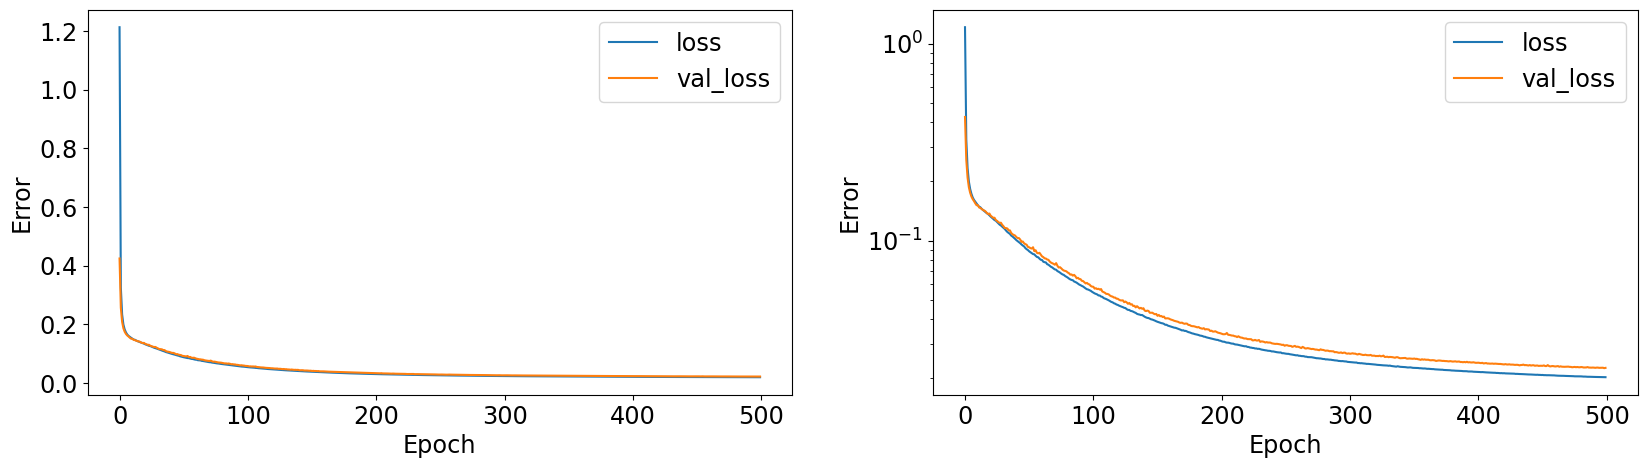

In [91]:
nEpochs = 500
trainModel(model_fc, nEpochs)

**Proszę:**

* napisać funkcję `plotGenerated(model, params)`, która rysuje panel z czterema obrazy wygenerowanymi przez sieć
  dla zadanego parametrów
* rysunki powinny zawierać okręgi narysowane z nominalnymi wartościami parametrów
* wywołać funkcję `plotGenerated(model, params)` dla modelu `model_fc` i parametrów:

$$
\Large{(x, y, R)} = (0,0,10), (16,0,10), (8,8,5), (8,8,1)
$$

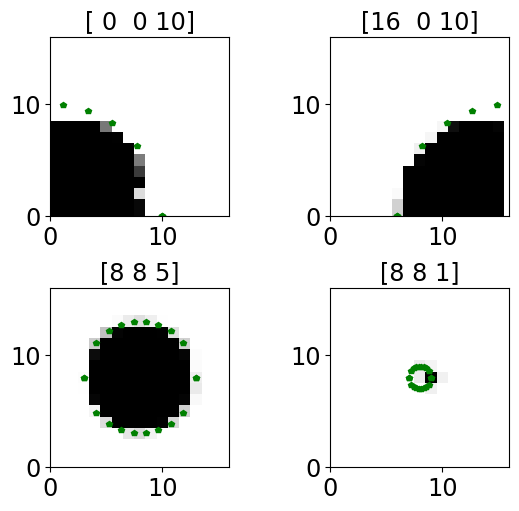

In [92]:
def plotGenerated(model, params):
   
    fig, axes = plt.subplots(2, 2, figsize=(5,5))
    
    for index, axis in enumerate(axes.flat):
        features = tf.Variable([params[index]], dtype=tf.int16)
        image = model(features)[0]
        axis.imshow(image, cmap='binary', origin='lower')
        axis.set_title(str(params[index])); 
        ##
        x = np.linspace(-params[index][2], params[index][2], 10)
        y = np.sqrt(params[index][2]**2-x**2)
        y = np.concatenate((y,-y), axis=0)
        x = np.concatenate((x,x), axis=0)
        x += params[index][0]
        y += params[index][1]
        axis.plot(x,y, "p", markersize=4, color='green')
        axis.set_xlim(0,image.shape[0])
        axis.set_ylim(0,image.shape[1])
    plt.subplots_adjust(bottom=0.02, left=0.02, right=0.98, wspace=0.4, hspace=0.4)


params = np.array( [(0,0,10), (16,0,10), (8,8,5), (8,8,1)] )
plotGenerated(model_fc, params)

**Proszę:**

* przeprowadzić trening sieci `model_cnn` z tymi samymi ustawieniami co dla sieci `model_dnn`
* narysować wygenerowane obrazy dla tych samych parametrów, co w przypadku sieci w pełni połączonej


Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1282 - val_loss: 0.1038
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1085 - val_loss: 0.1048
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1089 - val_loss: 0.1067
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1110 - val_loss: 0.1059
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1088 - val_loss: 0.1049
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1081 - val_loss: 0.1054
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1084 - val_loss: 0.1060
Epoch 8/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1099 - val_loss: 0.1071
Epoch 9/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1084 - val_loss: 0.1136
Epoch 10/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1108 - val_loss: 0.1149
Epoch 11/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1097 - val_loss: 0.1071
Epoch 12/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

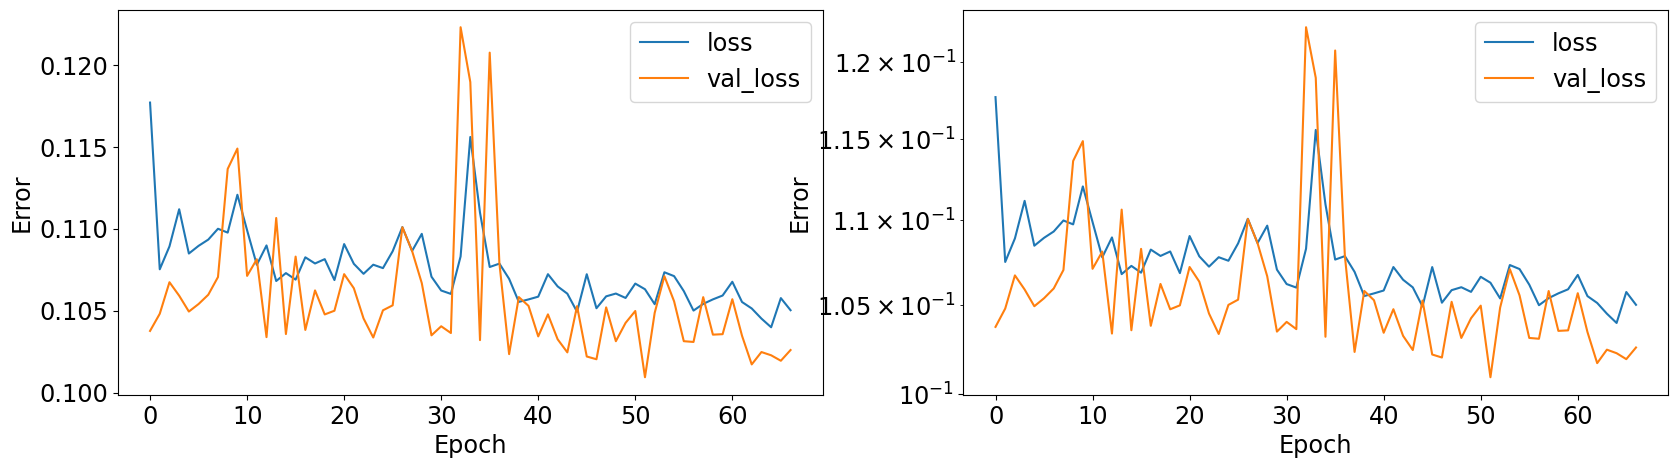

In [106]:
%%time
nEpochs = 500
trainModel(model_cnn, nEpochs)


pass

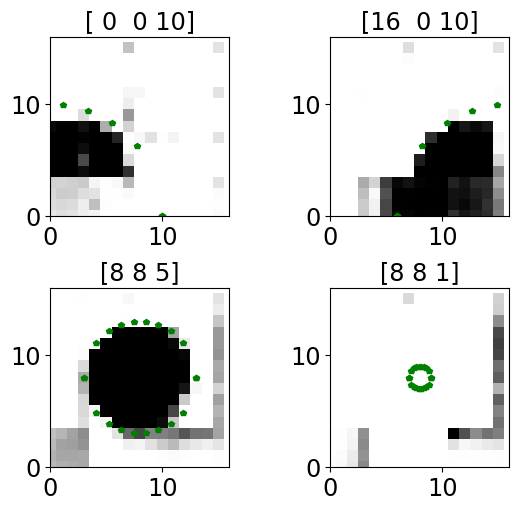

In [107]:
params = np.array( [(0,0,10), (16,0,10), (8,8,5), (8,8,1)] )
plotGenerated(model_cnn, params)

# Architektura autokodera

Sieć ze splotem nie trenuje się zbyt dobrze. Powodem może być niewłaściwa reprezentacja okręgu przez trzy liczby: `(x,y,R)`.
Może istnieje jakaś reprezentacja, która będzie szybciej prowadziła do uzyskania dobrego modelu?

Zamiast samodzielnie eksperymentować z różnymi reprezentacjami skonstruujemy sieć, która sama znajdzie reprezentację- **autokoder**, ang. `autoencoder, AE`.

Architektura AE składa się z dwu części:

**sieci kodującej** - sieci która z danych wejściowych tworzy reprezentację o zadanym rozmiarze. Przestrzeń do której prowadzi sieć kodująca jest nazywana przestrzenią ukrytą, ang. `hidden space` lub `bottleneck` - ponieważ to jest miejsce gdzie liczba parametrów opisujących zagadnienie jest zwykle najmniejsza.

**sieci dekodującej** - sieci która z reprezentacji w przestrzeni ukrytej odtwarza oryginalną postać danych wejściowych

W czasie treningu obrazy z dekodera są porównywane z danymi wejściowymi. Wagi są zmieniane tak, by minimalizować różnicę między nimi.

![image.png](attachment:137ea920-9e45-4daf-a448-29a4fd15ca49.png)

**Proszę:**

* stworzyć model `encoder` - konwolucyjną sieć kodującą wykonującą operację kodowana, czyli zmiany kształtu danych
$$
\Large{    
(16,16,1) \rightarrow (2,2,1)
}
$$
* proszę użyć klasy `tf.keras.Sequential`
* proszę wypisać na ekran podsumowanie modelu

In [159]:
encoder = tf.keras.Sequential(layers = [tf.keras.Input(shape=(16,16,1)),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2,2), padding='same'),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='same', activation='relu')],
                              name = 'encoder')

encoder.summary()
pass

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 2, 2, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 2, 2, 1)        │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* stworzyć model `decoder` - sieć dekodującą wykonującą operację odkodowana, czyli zmiany kształtu danych
$$
\Large{    
(2,2,1) \rightarrow (16,16,1)
}
$$
* proszę użyć klasy `tf.keras.Sequential`
* proszę użyć transponowanych splotowych warstw z tymi samymi ustawieniami jak w sieci kodującej
* proszę wypisać na ekran podsumowanie modelu

In [160]:
decoder = tf.keras.Sequential(layers = [tf.keras.Input(shape=(2,2,1)),
                                        tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same', activation='sigmoid')],
                              name = 'decoder')

decoder.summary()
pass

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_61             │ (None, 4, 4, 32)       │           320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_62             │ (None, 8, 8, 32)       │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_63             │ (None, 16, 16, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_64             │ (None, 16, 16, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,105 (74.63 KB)

 Trainable params: 19,105 (74.63 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* utworzyć  `model_cnn_ae` - autokoder -  sieć sekwencyjną która składa się z sieci kodującej, i dekodującej:
```Python

[encoder, decoder]

```
* wywołać model na jednym przykładzie korzystając z funkcji `predict`
```Python

model_cnn_ae.predict(...)
```
* wypisać na ekran podsumowanie modelu

**Uwaga:**
* model przyjmuje paczki, więc dane wejściowe muszą mieć odpowiedni wymiar, nawet jeśli podajemy pojedynczy przykład
* co jest teraz danymi wejściowymi do modelu?

In [161]:
model_cnn_ae = tf.keras.Sequential(layers = [encoder,decoder], name = 'autodecoder')
model_cnn_ae.summary()
model_cnn_ae.predict(labels[:1])
pass

Model: "autodecoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 2, 2, 1)        │         9,857 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 16, 16, 1)      │        19,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,962 (113.13 KB)

 Trainable params: 28,962 (113.13 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


**Proszę:**

* przeprowadzić trening autokodera
* użyć ustawień treningu jak dla poprzednich modeli

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6456 - val_loss: 0.4178
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3505 - val_loss: 0.2233
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2018 - val_loss: 0.1757
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1729 - val_loss: 0.1591
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1573 - val_loss: 0.1569
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1510 - val_loss: 0.1466
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1464 - val_loss: 0.1450
Epoch 8/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1411 - val_loss: 0.1439
Epoch 9/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1399 - val_loss: 0.1393
Epoch 10/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1354 - val_loss: 0.1351
Epoch 11/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1334 - val_loss: 0.1389
Epoch 12/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

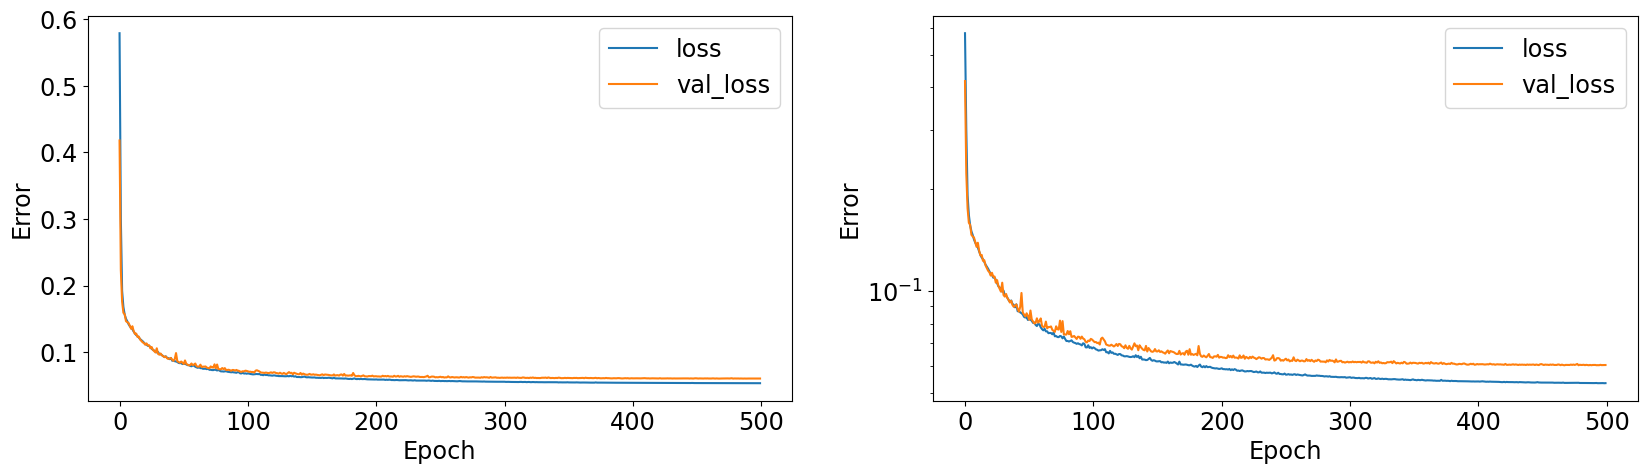

In [162]:
%%time
initial_learning_rate = 1E-3
batchSize = 64
nEpochs = 500
    
nStepsPerEpoch = int(len(labels)/batchSize)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*10,
                decay_rate=0.95,
                staircase=False)

model = model_cnn_ae
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='binary_crossentropy')

history = model.fit(x=labels, y=labels,
                        epochs=nEpochs, 
                        validation_split = 0.1,
                        verbose=1)

model.evaluate(labels, labels)    
plf.plotTrainHistory(history)
pass

**Proszę:**

* wypisać na ekran parametry pierwszego przykładu ze zbioru danych
* uruchomić koder na obrazie z pierwszego przykładu
* wypisać na ekran zakodowaną postać obrazu

In [163]:
index = 0
print(colored("Human readeable disc representation:","blue"), features[index])
z = encoder.predict(labels[index:index+1])
print(colored("Encoded representation:","blue"), z)
pass

Human readeable disc representation: [ 1 11  7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Encoded representation: [[[[2.8640053]
   [8.036776 ]]

  [[0.       ]
   [7.4877405]]]]


2025-04-30 13:15:28.075615: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


**Proszę:**

* napisać funkcję `plotDecoded(model)` która rysuje rysunki uzyskane z modelu `model_cnn_ae` dla czterech losowych przykładów z danych treningowych:
    * parametry z przykładów treningowych są kodowane przez `encoder`
    * zakodowane parametry są odkodowywane przez `decoder`
* rysunki powinny być podpisane wartościami parametrów
* rysunki powinny zawierać okręgi narysowane z nominalnymi wartościami parametrów

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0254


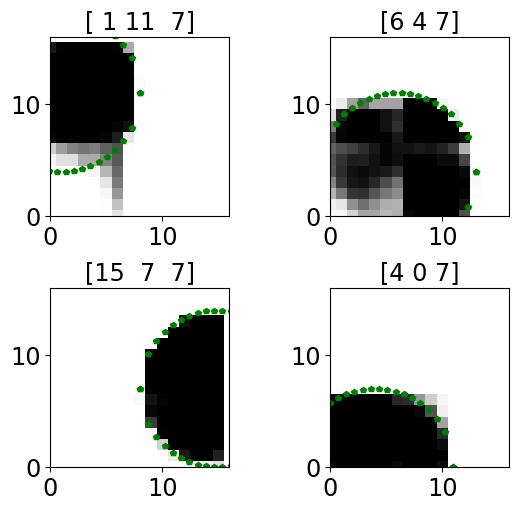

In [189]:
def plotDecoded(model):
    fig, axes = plt.subplots(2, 2, figsize=(5,5))
    
    data_indices = np.array([0, 1, 2, 3])
    #data_indices = np.array([6, 9, 2, 3])
    for index, axis in enumerate(axes.flat):
        data_index = data_indices[index]
        image = labels[data_index:data_index+1]

        model.evaluate(image, image)
        z = encoder.predict(image, verbose=0)
        image = decoder.predict(z, verbose=0)[0,:,:,0]
        axis.imshow(image, cmap='binary', origin='lower')
        axis.set_title(str(features[data_index])); 
        ##
        x = np.linspace(-features[data_index][2], features[data_index][2], 20)
        y = np.sqrt(features[data_index][2]**2-x**2)
        y = np.concatenate((y,-y), axis=0)
        x = np.concatenate((x,x), axis=0)
        y += features[data_index][1]
        x += features[data_index][0]
        axis.plot(x,y, "p", markersize=4, color='green') 
        axis.set_xlim([0, image.shape[0]])
        axis.set_ylim([0, image.shape[1]])
    plt.subplots_adjust(bottom=0.02, left=0.02, right=0.98, wspace=0.4, hspace=0.4)


plotDecoded(model_cnn_ae)

In [199]:
z = 0
index = 0
z = encoder.predict(labels[index:index+1])
print(colored("Encoded representation:","blue"), z)
print(colored("Encoded shape:","blue"), z.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Encoded representation: [[[[2.8640053]
   [8.036776 ]]

  [[0.       ]
   [7.4877405]]]]
Encoded shape: (1, 2, 2, 1)


# Zadanie domowe

Skonstruować sieć, która będzie generowała obrazy okręgów o rozdzielczości `(256, 256)`.


**Proszę:**

* wygenerować 1024 przykłady obrazów okręgów o rozdzielczości `(256,256)` o losowych parametrach:
    * współrzędne środka w zakresie [0,N]
    * promień w zakresie [0,N/2]
     
* skonstruować **sieć w pełni połączoną** generującą obrazy z trójki:
$$
\Large{(x, y, R)}
$$

* skonstruować **sieć autokodującą** z wymiarem ukrytym o kształcie `(4,4,1)`
* przeprowadzić trening obu sieci
* narysować obrazy dla czterepch pierwszych przykładów ze zbioru treningowego
* zwrócić uwagę na rozmiar modeli

In [ ]:
##Data generation
...rozwiązanie...
print(colored("Features shape:","blue"),features.shape)
print(colored("Labels shape:","blue"),labels.shape)

In [ ]:
%%time
## autoencoder model
...rozwiązanie...
#Evaluation
plotDecoded(model_cnn_ae)

In [ ]:
%%time
##fully connected model
...rozwiązanie...
#model evaluation
params = features[0:4]
plotGenerated(model_fc, params)